In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9806-1F72

 Directory of C:\Users\Armstrongs\Desktop\GitHub\Relax Inc

01/29/2022  01:03 PM    <DIR>          .
01/29/2022  01:03 PM    <DIR>          ..
01/29/2022  11:10 AM    <DIR>          .ipynb_checkpoints
01/28/2022  01:14 PM                 0 Chinook.sqlite
01/29/2022  12:54 PM         1,133,777 flagged_users
01/27/2022  07:18 PM    <DIR>          relax_challenge
01/27/2022  07:18 PM            99,913 relax_data_science_challenge.pdf
01/29/2022  11:12 AM               588 RelaxInc_models.ipynb
01/29/2022  01:03 PM           311,285 Relaxinc_Notebook.ipynb
01/27/2022  07:18 PM         5,832,711 takehome_user_engagement.csv
01/27/2022  07:18 PM         1,162,702 takehome_users.csv
               7 File(s)      8,540,976 bytes
               4 Dir(s)  830,358,319,104 bytes free


In [3]:
#users = pd.read_csv('takehome_users.csv')
eng = pd.read_csv('takehome_user_engagement.csv')

In [4]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [6]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
#I'm going to drop last session as there is not enough data there for the feature to be used
users.drop(columns=['last_session_creation_time'], inplace=True)

In [10]:
#Making a new feature signalling whether a user was invited by another existing user
conditions = [
    (users['invited_by_user_id'].isnull() == True),
    (users['invited_by_user_id'].isnull() == False),
    ]
values = [0, 1]
users['invited'] = np.select(conditions, values)
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,1


In [11]:
#There are too many individual invitations to say whether getting invited by a specific user has an impact on the target. 
#Dropping feature. 
users.drop(columns=['invited_by_user_id'], inplace=True)

<AxesSubplot:>

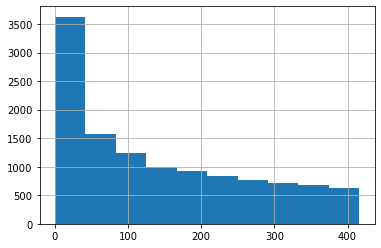

In [12]:
users.org_id.hist()

sort engage by user_id
create elapsed days metric
if elapsed days > 7

In [13]:
eng.sort_values(['user_id', 'time_stamp'], inplace=True)

In [14]:
eng['Date'] = pd.to_datetime(eng['time_stamp']).dt.date

In [15]:
eng['dateshift'] = eng['Date'].shift(1)

In [16]:
userfilter = eng['user_id'] == eng['user_id'].shift(1)

In [17]:
eng.head()

,time_stamp,user_id,visited,Date,dateshift
0,2014-04-22 03:53:30,1,1,2014-04-22,NaN
1,2013-11-15 03:45:04,2,1,2013-11-15,2014-04-22
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-11-15
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-11-29
4,2013-12-25 03:45:04,2,1,2013-12-25,2013-12-09


In [18]:
eng.loc[userfilter, 'interval'] = eng['Date'] - eng['dateshift']

In [19]:
eng.head()

,time_stamp,user_id,visited,Date,dateshift,interval
0,2014-04-22 03:53:30,1,1,2014-04-22,NaN,NaT
1,2013-11-15 03:45:04,2,1,2013-11-15,2014-04-22,NaT
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-11-15,14 days
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-11-29,10 days
4,2013-12-25 03:45:04,2,1,2013-12-25,2013-12-09,16 days


In [20]:
ints = list(eng['interval'])
ints.pop(0)
ints.pop(0)

NaT

In [21]:
days = []
for i in ints:
    day = i.days
    days.append(day)

In [22]:
days.insert(0, 0)
days.insert(0, 0)

In [23]:
eng['cint'] = days

In [24]:
eng['moving'] = eng.groupby('user_id')['cint'].transform(lambda x: x.rolling(3, 1).sum())
eng.head()
#above adapted from https://stackoverflow.com/questions/53339021/python-pandas-calculate-moving-average-within-group

,time_stamp,user_id,visited,Date,dateshift,interval,cint,moving
0,2014-04-22 03:53:30,1,1,2014-04-22,NaN,NaT,0.0,0.0
1,2013-11-15 03:45:04,2,1,2013-11-15,2014-04-22,NaT,0.0,0.0
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-11-15,14 days,14.0,14.0
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-11-29,10 days,10.0,24.0
4,2013-12-25 03:45:04,2,1,2013-12-25,2013-12-09,16 days,16.0,40.0


In [25]:
eng['count'] = eng.groupby('user_id')['visited'].transform(lambda x: x.cumsum())

In [26]:
eng.head()

,time_stamp,user_id,visited,Date,dateshift,interval,cint,moving,count
0,2014-04-22 03:53:30,1,1,2014-04-22,NaN,NaT,0.0,0.0,1
1,2013-11-15 03:45:04,2,1,2013-11-15,2014-04-22,NaT,0.0,0.0,1
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-11-15,14 days,14.0,14.0,2
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-11-29,10 days,10.0,24.0,3
4,2013-12-25 03:45:04,2,1,2013-12-25,2013-12-09,16 days,16.0,40.0,4


In [27]:
conditions = [
    (eng['count'] >= 3) & (eng['moving'] <= 7),
    ((eng['count'] <= 3) | (eng['moving'] >= 7))
    ]
values = [1, 0]
eng['Target'] = np.select(conditions, values)
eng.head()

,time_stamp,user_id,visited,Date,dateshift,interval,cint,moving,count,Target
0,2014-04-22 03:53:30,1,1,2014-04-22,NaN,NaT,0.0,0.0,1,0
1,2013-11-15 03:45:04,2,1,2013-11-15,2014-04-22,NaT,0.0,0.0,1,0
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-11-15,14 days,14.0,14.0,2,0
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-11-29,10 days,10.0,24.0,3,0
4,2013-12-25 03:45:04,2,1,2013-12-25,2013-12-09,16 days,16.0,40.0,4,0


In [28]:
active = eng[eng['Target'] == 1]
active_users = active.user_id.unique()
active_users = list(active_users)

In [29]:
users["Target"] = np.where(users["object_id"].isin(active_users), 1, 0)

In [30]:
users['Target'].value_counts()

0    10591
1     1409
Name: Target, dtype: int64

In [31]:
users.to_csv('flagged_users')

In [32]:
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited,Target
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,1,0


In [33]:
users['domain'] = users['email'].str.split('@').str[1]
# adapted from https://stackoverflow.com/questions/53044548/how-to-extract-domain-from-email-address-with-pandas

In [34]:
domain_vals = users.domain.value_counts()
domain_vals[:10]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
rerwl.com            2
oqpze.com            2
qgjbc.com            2
dqwln.com            2
Name: domain, dtype: int64

In [35]:
#replacing all but top email values with the term ("Other")
allowed_vals = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']


In [36]:
users.shape

(12000, 11)

In [37]:
domain_mask = users[users['domain'].isin(allowed_vals)]

In [38]:
users["domain2"] = np.where(users["domain"].isin(allowed_vals), users['domain'], None)

In [39]:
users['domain2'].fillna('Other', inplace=True)

In [40]:
users.drop(columns=['domain'], inplace=True)
users.rename(columns = {'domain2' : 'domain_name'}, inplace=True)

In [41]:
musers = users.drop(columns = ['object_id', 'name', 'email', 'org_id', 'creation_time'])

In [42]:
musers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             12000 non-null  object
 1   opted_in_to_mailing_list    12000 non-null  int64 
 2   enabled_for_marketing_drip  12000 non-null  int64 
 3   invited                     12000 non-null  int32 
 4   Target                      12000 non-null  int32 
 5   domain_name                 12000 non-null  object
dtypes: int32(2), int64(2), object(2)
memory usage: 468.9+ KB


In [43]:
musers = pd.get_dummies(musers)

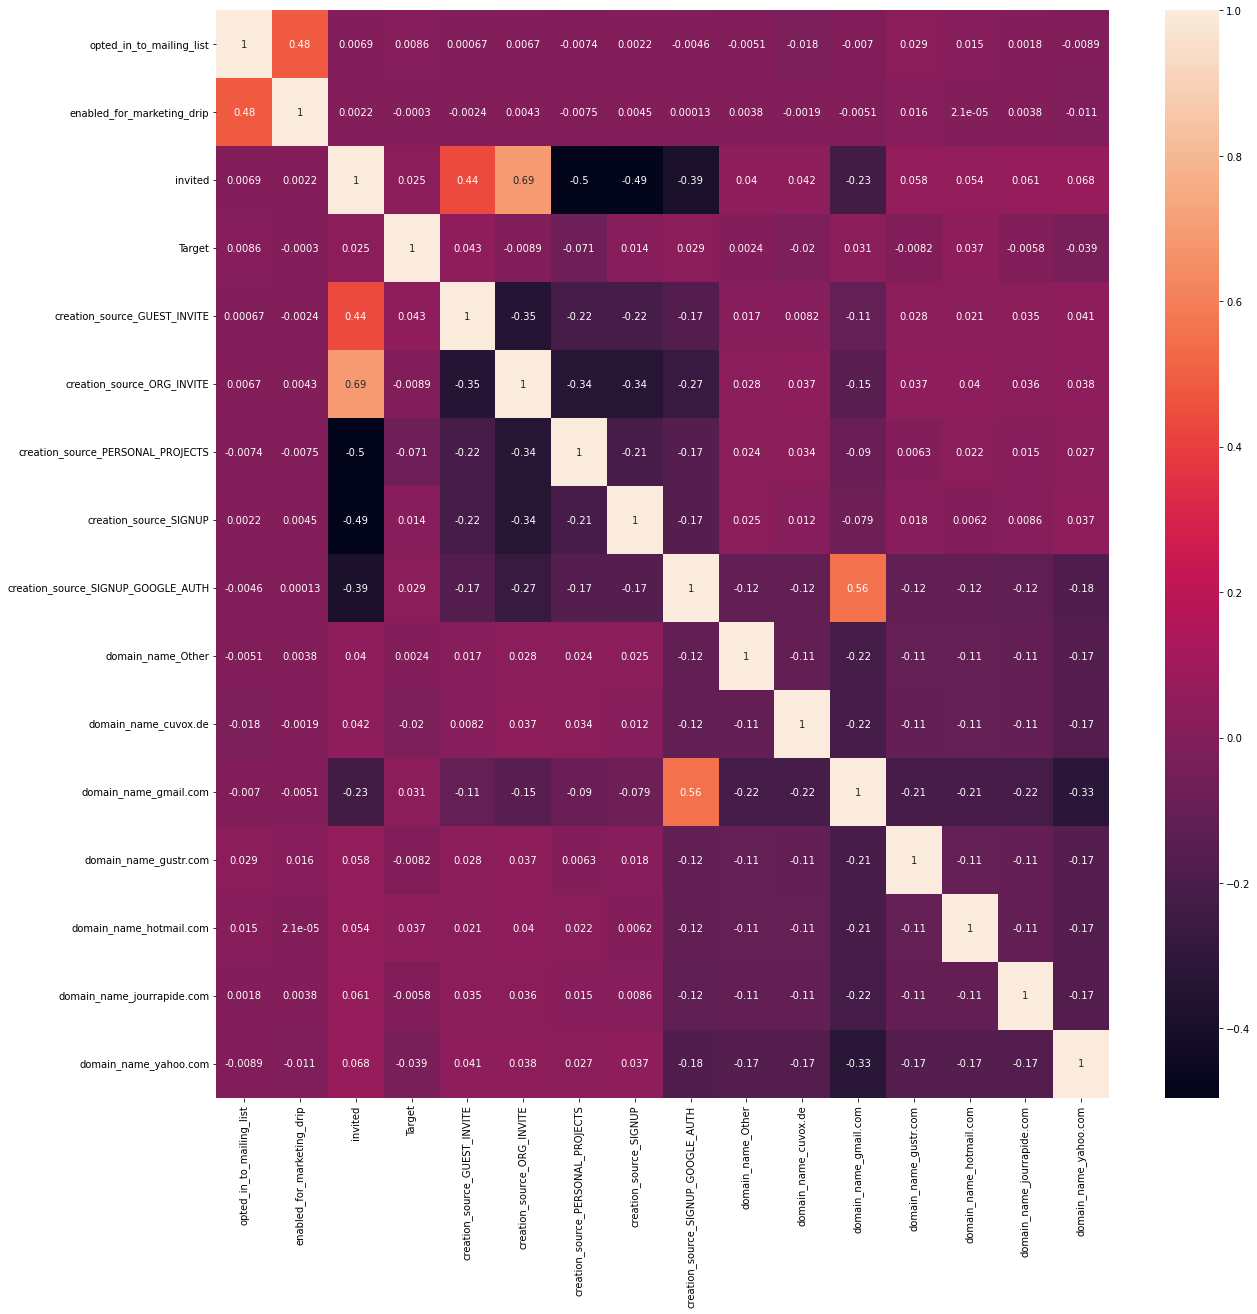

In [44]:
plt.figure(figsize = (20, 20))
sns.heatmap(musers.corr(), annot=True)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import itertools

In [46]:
musers.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,Target,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,domain_name_Other,domain_name_cuvox.de,domain_name_gmail.com,domain_name_gustr.com,domain_name_hotmail.com,domain_name_jourrapide.com,domain_name_yahoo.com
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.249500,0.149333,0.534750,0.117417,0.180250,0.354500,0.175917,0.173917,0.115417,0.098833,0.100167,0.296833,0.098250,0.097083,0.104917,0.203917
std,0.432742,0.356432,0.498812,0.321930,0.384412,0.478381,0.380765,0.379054,0.319537,0.298451,0.300235,0.456881,0.297665,0.296084,0.306459,0.402925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X = musers.drop(columns=['Target'])
y = musers['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
#Adapted from Random Forest Case Study Springboard

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [50]:
clf = RandomForestClassifier(n_estimators=400, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', \
                            max_depth = 30, bootstrap = True)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.880
Random Forest: f1-score=0.824


In [51]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending = False)
print(feature_importances.head(5))
print(feature_importances.tail(5))

                                   importance
opted_in_to_mailing_list             0.194929
enabled_for_marketing_drip           0.181624
creation_source_PERSONAL_PROJECTS    0.117602
domain_name_hotmail.com              0.057974
creation_source_GUEST_INVITE         0.056823
                                    importance
domain_name_cuvox.de                  0.039715
creation_source_ORG_INVITE            0.036099
creation_source_SIGNUP                0.035836
invited                               0.028534
creation_source_SIGNUP_GOOGLE_AUTH    0.024021


In [52]:
class_names = [0, 1]

In [53]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
#Adapted from the Random Forest Case study from Springboard

Normalized confusion matrix


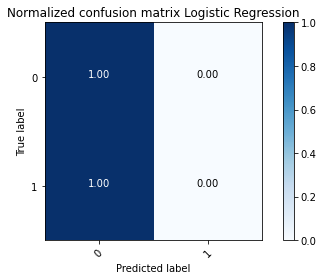

In [54]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix Logistic Regression')

In [55]:
sum(list(y_test))

287

In [56]:
cm

array([[2113,    0],
       [ 287,    0]], dtype=int64)

In [57]:
list(y_pred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [58]:
musers['Target'].value_counts()

0    10591
1     1409
Name: Target, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
#Adapted from Random Forest Case Study Springboard

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [66]:
clf = RandomForestClassifier(n_estimators=400, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', \
                            max_depth = 30, bootstrap = True)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.586
Random Forest: f1-score=0.584


In [67]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending = False)
print(feature_importances.head(5))
print(feature_importances.tail(5))

                                   importance
creation_source_PERSONAL_PROJECTS    0.169506
enabled_for_marketing_drip           0.168315
opted_in_to_mailing_list             0.166436
domain_name_hotmail.com              0.074639
domain_name_yahoo.com                0.059637
                                    importance
domain_name_Other                     0.035958
creation_source_ORG_INVITE            0.031693
invited                               0.030904
domain_name_gustr.com                 0.028179
creation_source_SIGNUP_GOOGLE_AUTH    0.019984


Normalized confusion matrix


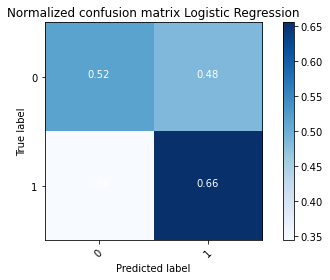

In [68]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix Logistic Regression')

In [70]:
cm

array([[1088, 1023],
       [ 732, 1394]], dtype=int64)